<a href="https://colab.research.google.com/github/AzamChatrAzar/project1/blob/main/Graph1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

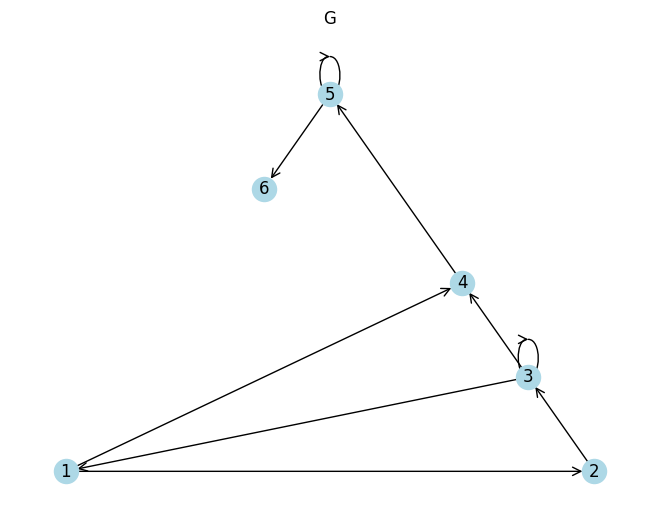

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# ایجاد گراف جهت‌دار
G = nx.DiGraph()

# رئوس
vertices = [1, 2, 3, 4, 5, 6]
G.add_nodes_from(vertices)

# یال‌ها
edges = [
    (1, 2), (2, 3), (3, 1),
    (1, 4), (4, 5), (5, 6),(5,5),(3,3),
    (3, 4)
]
G.add_edges_from(edges)

# رسم گراف
pos = nx.planar_layout(G)  # چینش مسطح
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        arrows=True, arrowstyle='->', arrowsize=15)
plt.title("G")
plt.show()

In [10]:
import numpy as np


adj_matrix = np.zeros((6, 6), dtype=int)

# پر کردن ماتریس بر اساس یال‌ها
for (u, v) in edges:
    adj_matrix[u-1][v-1] = 1

# نمایش ماتریس
print("ماتریس مجاورت گراف:")
print(adj_matrix)

ماتریس مجاورت گراف:
[[0 1 0 1 0 0]
 [0 0 1 0 0 0]
 [1 0 1 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]]


In [11]:

# محاسبه درجه خروجی هر راس
out_degree = {v: 0 for v in vertices}
for (u, v) in edges:
    out_degree[u] += 1

# ایجاد ماتریس انتقال (۶x۶)
P = np.zeros((6, 6))

# پر کردن ماتریس انتقال
for (u, v) in edges:
    P[u-1][v-1] = 1 / out_degree[u]  # چون پایتون ایندکس از ۰ شروع می‌شود

# نمایش ماتریس انتقال
print("ماتریس انتقال (P):")
print(P)

ماتریس انتقال (P):
[[0.         0.5        0.         0.5        0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         0.         0.         0.        ]]


In [12]:
import numpy as np


alpha = 0.85
n = 6


# ماتریس اتصال یکنواخت (Teleportation)
teleport = np.ones((n, n)) / n

# محاسبه ماتریس Pα
P_alpha = alpha * P + (1 - alpha) * teleport

# نمایش ماتریس Pα
print(f"ماتریس انتقال پیج رنک (P_alpha) با آلفا = {alpha}:")
print(np.round(P_alpha, 4))

ماتریس انتقال پیج رنک (P_alpha) با آلفا = 0.85:
[[0.025  0.45   0.025  0.45   0.025  0.025 ]
 [0.025  0.025  0.875  0.025  0.025  0.025 ]
 [0.3083 0.025  0.3083 0.3083 0.025  0.025 ]
 [0.025  0.025  0.025  0.025  0.875  0.025 ]
 [0.025  0.025  0.025  0.025  0.45   0.45  ]
 [0.025  0.025  0.025  0.025  0.025  0.025 ]]


In [13]:
alpha = float(input("مقدار آلفا را وارد کنید (مثلا 0.85): "))

n = 6



P_alpha = alpha * P + (1 - alpha) * np.ones((n, n)) / n
print(f"P_alpha با آلفا = {alpha}:\n", np.round(P_alpha, 4))

مقدار آلفا را وارد کنید (مثلا 0.85): 0.85
P_alpha با آلفا = 0.85:
 [[0.025  0.45   0.025  0.45   0.025  0.025 ]
 [0.025  0.025  0.875  0.025  0.025  0.025 ]
 [0.3083 0.025  0.3083 0.3083 0.025  0.025 ]
 [0.025  0.025  0.025  0.025  0.875  0.025 ]
 [0.025  0.025  0.025  0.025  0.45   0.45  ]
 [0.025  0.025  0.025  0.025  0.025  0.025 ]]


In [14]:


# محاسبه مقادیر ویژه و بردارهای ویژه
eigenvalues, eigenvectors = np.linalg.eig(P_alpha.T)

# ماتریس قطری D
D = np.diag(eigenvalues)

# ماتریس V (بردارهای ویژه به صورت ستونی)
V = eigenvectors

# معکوس V
V_inv = np.linalg.inv(V)

# بررسی صحت تجزیه: P_alpha^T ≈ V D V^{-1}
reconstructed = (V @ D @ V_inv).real

print("مقادیر ویژه:\n", np.round(eigenvalues, 4))
print("\nبردارهای ویژه (ستون‌ها):\n", np.round(V, 4))
print("\nماتریس قطری D:\n", np.round(D, 4))
print("\nبررسی صحت تجزیه (P_alpha^T ≈ V D V^{-1}):\n", np.round(reconstructed, 4))

مقادیر ویژه:
 [ 0.8256+0.j     -0.1543+0.395j  -0.1543-0.395j  -0.0994+0.j
  0.2204+0.1186j  0.2204-0.1186j]

بردارهای ویژه (ستون‌ها):
 [[-1.864e-01+0.j     -1.337e-01-0.3042j -1.337e-01+0.3042j
   4.340e-02+0.j      5.540e-02+0.02j    5.540e-02-0.02j  ]
 [-1.614e-01+0.j     -2.525e-01+0.2294j -2.525e-01-0.2294j
  -7.000e-04+0.j      1.140e-02+0.0165j  1.140e-02-0.0165j]
 [-3.525e-01+0.j      4.787e-01+0.j      4.787e-01-0.j
   4.970e-02+0.j      1.160e-01+0.0511j  1.160e-01-0.0511j]
 [-2.824e-01+0.j     -3.689e-01-0.0685j -3.689e-01+0.0685j
  -1.423e-01+0.j      1.544e-01+0.0052j  1.544e-01-0.0052j]
 [-7.340e-01+0.j      3.118e-01+0.3233j  3.118e-01-0.3233j
   2.657e-01+0.j     -3.939e-01-0.233j  -3.939e-01+0.233j ]
 [-4.433e-01+0.j      1.708e-01-0.4152j  1.708e-01+0.4152j
  -9.512e-01+0.j     -8.641e-01+0.j     -8.641e-01-0.j    ]]

ماتریس قطری D:
 [[ 0.8256+0.j      0.    +0.j      0.    +0.j      0.    +0.j
   0.    +0.j      0.    +0.j    ]
 [ 0.    +0.j     -0.1543+0.395j   0.  

In [12]:

# یافتن اندیس مقدار ویژه ۱
index_1 = np.argmax(np.isclose(eigenvalues, 1.0))

# استخراج بردار ویژه متناظر با مقدار ویژه ۱
v_max = eigenvectors[:, index_1].real
# نرمال‌سازی بردار به جمع ۱
v_max /= np.sum(v_max)

# چاپ بردار v_max
print("بردار ویژه متناظر با مقدار ویژه ۱ (v_max):")
print(np.round(v_max, 4))

بردار ویژه متناظر با مقدار ویژه ۱ (v_max):
[0.0937 0.0836 0.1726 0.1379 0.3212 0.191 ]


In [7]:
class BinaryPolynomial:
    def __init__(self, degree, coefficients=None):
        self.degree = degree
        if coefficients is None:
            self.coefficients = [0] * (degree + 1)
        else:
            if len(coefficients) != degree + 1:
                raise ValueError(f"تعداد ضرایب باید {degree + 1} باشد!")
            self.coefficients = coefficients
        self._validate_coefficients()

    def _validate_coefficients(self):
        for coeff in self.coefficients:
            if coeff not in {0, 1}:
                raise ValueError("ضرایب باید ۰ یا ۱ باشند!")

    def set_coefficient(self, power, value):
        if value not in {0, 1}:
            raise ValueError("ضریب باید ۰ یا ۱ باشد!")
        if power < 0 or power > self.degree:
            raise ValueError(f"توان باید بین ۰ تا {self.degree} باشد!")
        self.coefficients[power] = value

    def __str__(self):
        terms = []
        for power, coeff in enumerate(self.coefficients):
            if coeff == 1:
                if power == 0:
                    terms.append("1")
                elif power == 1:
                    terms.append("x")
                else:
                    terms.append(f"x^{power}")
        return " + ".join(terms) if terms else "0"

# دریافت ورودی از کاربر
if __name__ == "__main__":
    # دریافت درجه
    while True:
        try:
            degree = int(input("درجه چندجمله‌ای را وارد کنید: "))
            if degree < 0:
                raise ValueError("درجه باید عددی مثبت باشد!")
            break
        except ValueError as e:
            print(f"خطا: {e}")

    # دریافت ضرایب
    while True:
        try:
            coeff_input = input("ضرایب را به ترتیب از کم‌توان به پرتوان با کاما جدا کنید (مثلاً 1,0,1): ")
            coefficients = [int(c.strip()) for c in coeff_input.split(",")]

            if len(coefficients) != degree + 1:
                raise ValueError(f"تعداد ضرایب باید {degree + 1} باشد!")

            h = BinaryPolynomial(degree, coefficients)
            break
        except ValueError as e:
            print(f"خطا: {e}")

    print(f"\nچندجمله‌ای ایجاد شده: {h}")

    # امکان تغییر ضرایب پس از ایجاد
    while True:
        change = input("\nآیا می‌خواهید ضریبی را تغییر دهید؟ (no/yes): ").strip().lower()
        if change != 'yes':
            break

        try:
            power = int(input("توان مورد نظر را وارد کنید: "))
            value = int(input("مقدار جدید ضریب (۰ یا ۱) را وارد کنید: "))
            h.set_coefficient(power, value)
            print(f"چندجمله‌ای پس از تغییر: {h}")
        except ValueError as e:
            print(f"خطا: {e}")

    print("\nنتیجه نهایی:")
    print(h)

درجه چندجمله‌ای را وارد کنید: 2
ضرایب را به ترتیب از کم‌توان به پرتوان با کاما جدا کنید (مثلاً 1,0,1): 1,1,1

چندجمله‌ای ایجاد شده: 1 + x + x^2

آیا می‌خواهید ضریبی را تغییر دهید؟ (no/yes): no

نتیجه نهایی:
1 + x + x^2


In [15]:

# محاسبه h(P_alpha)
def compute_polynomial_on_matrix(P, polynomial):
    n = P.shape[0]
    result = np.zeros((n, n))

    for power, coeff in enumerate(polynomial.coefficients):
        if coeff == 1:
            if power == 0:
                result += np.eye(n)  # I برای توان ۰
            else:
                result += np.linalg.matrix_power(P, power)  # P^power
    return result

h_Palpha = compute_polynomial_on_matrix(P_alpha, h)
print("h(P_alpha) = \n", np.round(h_Palpha, 4))

h(P_alpha) = 
 [[1.0571 0.4856 0.4396 0.4927 0.4431 0.0606]
 [0.2979 1.0606 1.1692 0.3085 0.0819 0.0606]
 [0.4207 0.181  1.4419 0.5517 0.3227 0.0606]
 [0.0571 0.0606 0.0783 1.0677 1.2931 0.4219]
 [0.0571 0.0606 0.0783 0.0677 1.6875 0.6662]
 [0.0358 0.0394 0.0571 0.0465 0.0606 1.0394]]


In [16]:


# محاسبه مقادیر ویژه و بردارهای ویژه
eigenvalues, eigenvectors = np.linalg.eig(h_Palpha)

# یافتن بزرگترین مقدار ویژه (از نظر قدر مطلق)
max_eigenvalue_index = np.argmax(np.abs(eigenvalues))
h_max = eigenvalues[max_eigenvalue_index]

# بردار ویژه متناظر با بزرگترین مقدار ویژه
v_max = eigenvectors[:, max_eigenvalue_index].real  # قسمت حقیقی

# نرمال‌سازی بردار ویژه به جمع ۱ (برای تفسیر احتمالی)
v_max_normalized = v_max / np.sum(v_max)

# نمایش نتایج
print("بزرگترین مقدار ویژه (h_max):", np.round(h_max, 4))
print("\nبردار ویژه متناظر (غیرنرمال‌شده):\n", np.round(v_max, 4))
print("\nبردار ویژه نرمال‌شده (جمع=1):\n", np.round(v_max_normalized, 4))

بزرگترین مقدار ویژه (h_max): (2.5071+0j)

بردار ویژه متناظر (غیرنرمال‌شده):
 [0.5131 0.593  0.5123 0.2763 0.2047 0.0656]

بردار ویژه نرمال‌شده (جمع=1):
 [0.237  0.2739 0.2366 0.1276 0.0945 0.0303]
